<a href="https://colab.research.google.com/github/nattapatkab-prog/EGBI_pair/blob/main/BMW_car_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load data**

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df.info())

| longitude   | latitude   | housing_median_age   | total_rooms   | total_bedrooms   | population   | households   | median_income   | median_house_value   |
|:------------|:-----------|:---------------------|:--------------|:-----------------|:-------------|:-------------|:----------------|:---------------------|
| -114.31     | 34.19      | 15                   | 5612          | 1283             | 1015         | 472          | 1.4936          | 66900                |
| -114.47     | 34.4       | 19                   | 7650          | 1901             | 1129         | 463          | 1.82            | 80100                |
| -114.56     | 33.69      | 17                   | 720           | 174              | 333          | 117          | 1.6509          | 85700                |
| -114.57     | 33.64      | 14                   | 1501          | 337              | 515          | 226          | 3.1917          | 73400                |
| -114.57     | 33.57      | 20                   | 

In [ ]:
import pandas as pd

df = pd.read_csv('bmw.csv')
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df.info())

| model    | year   | price   | transmission   | mileage   | fuelType   | tax   | mpg   | engineSize   |
|:---------|:-------|:--------|:---------------|:----------|:-----------|:------|:------|:-------------|
| 5 Series | 2014   | 11200   | Automatic      | 67068     | Diesel     | 125   | 57.6  | 2            |
| 6 Series | 2018   | 27000   | Automatic      | 14827     | Petrol     | 145   | 42.8  | 2            |
| 5 Series | 2016   | 16000   | Automatic      | 62794     | Diesel     | 160   | 51.4  | 3            |
| 1 Series | 2017   | 12750   | Automatic      | 26676     | Diesel     | 145   | 72.4  | 1.5          |
| 7 Series | 2014   | 14500   | Automatic      | 39554     | Diesel     | 160   | 50.4  | 3            |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non

### **Prepare the transmission data**


In [ ]:
transmission_counts = df['transmission'].value_counts()
print(transmission_counts)

transmission
Semi-Auto    4666
Automatic    3588
Manual       2527
Name: count, dtype: int64


Create the pie chart

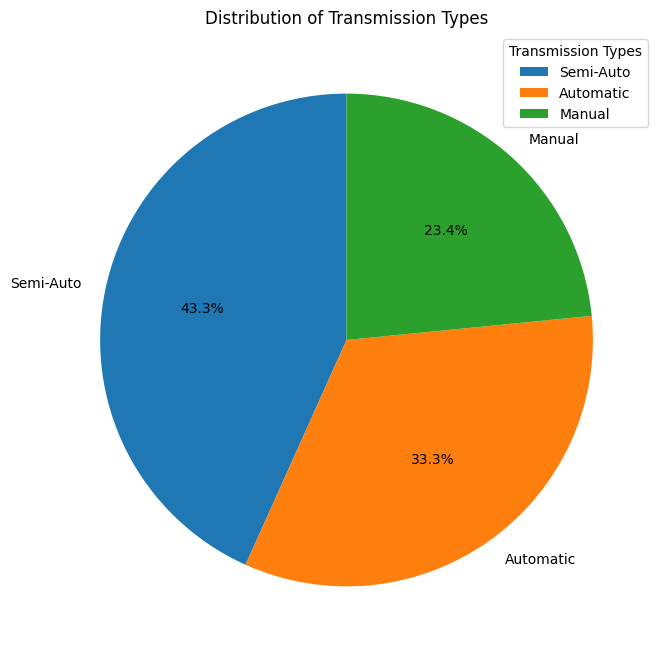

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Transmission Types')
plt.legend(title='Transmission Types')
plt.show()

### **Quantity of fuel type per year**

In [ ]:
fuel_type_counts = df.groupby(['year', 'fuelType']).size().reset_index(name='count')
display(fuel_type_counts.head())


,year,fuelType,count
0,1996,Petrol,1
1,1997,Petrol,1
2,1998,Petrol,1
3,1999,Petrol,4
4,2000,Petrol,2


Create the bar chart

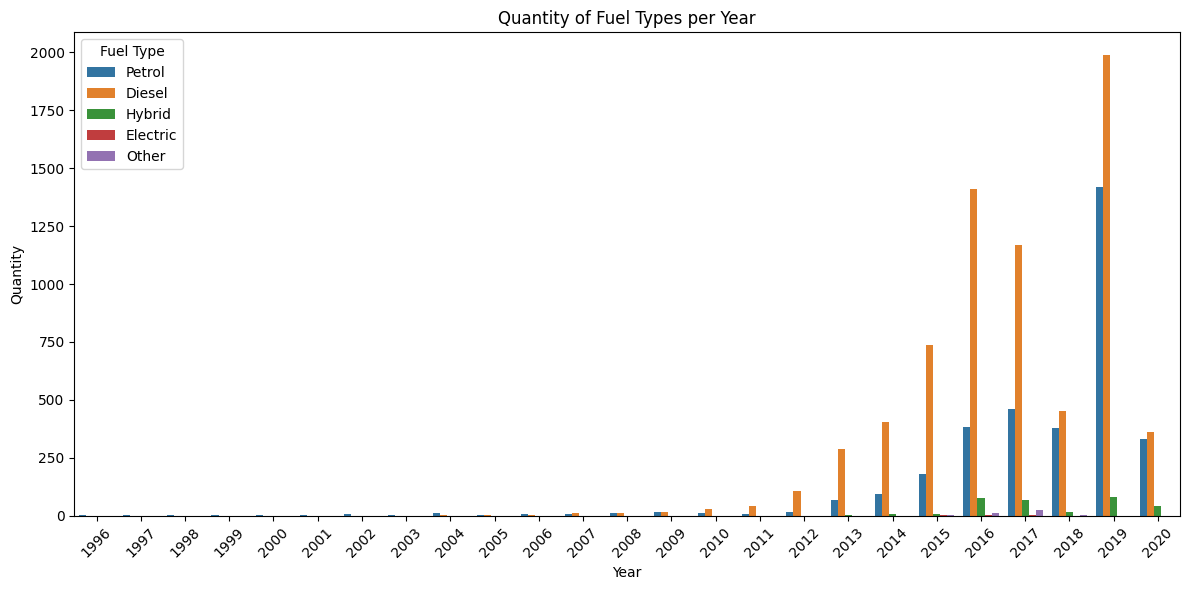

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=fuel_type_counts, x='year', y='count', hue='fuelType')
plt.title('Quantity of Fuel Types per Year')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

### **Average price for each car model**

In [ ]:
average_price_by_model = df.groupby('model')['price'].mean().sort_values(ascending=False)
display(average_price_by_model.head(10))

,price
model,
X7,69842.763636
8 Series,63997.794872
M5,57760.000000
i8,57012.588235
X6,43838.613208
M4,43274.232000
M2,43140.333333
X5,39651.196581
7 Series,36934.320755


Create the bar chart

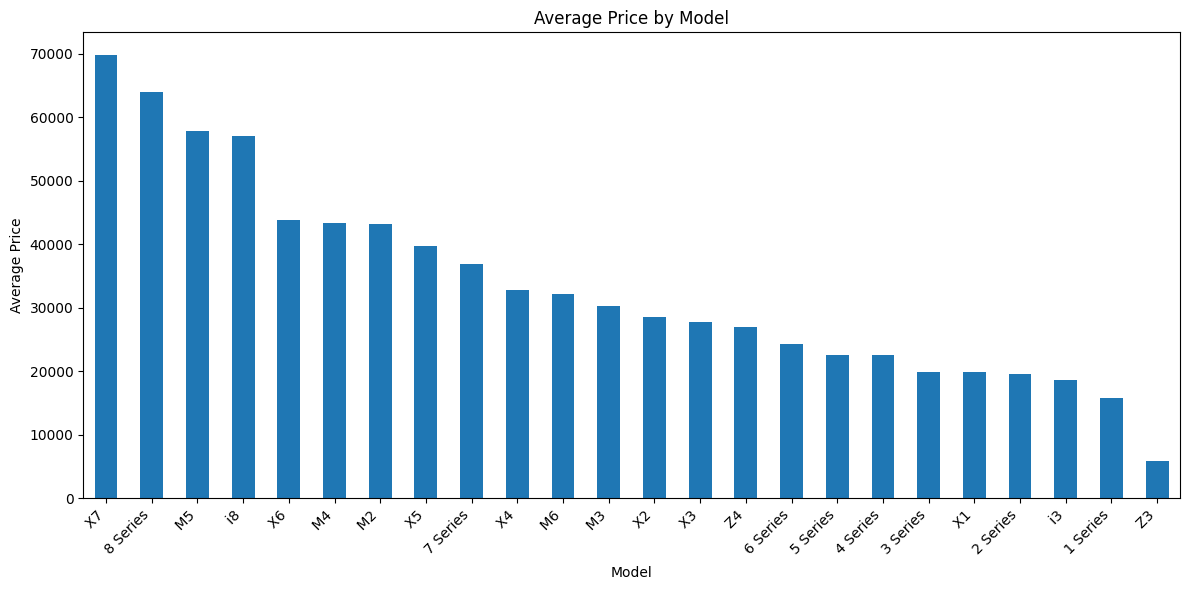

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
average_price_by_model.plot(kind='bar')
plt.title('Average Price by Model')
plt.xlabel('Model')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()